In [1]:
# Arrays implement the NumPy API
import dask.array as da
x = da.random.random(size=(1000, 1000),
                     chunks=(1000, 1000))
y = x + x.T - x.mean(axis=0)

In [2]:
print(x)

dask.array<random_sample, shape=(1000, 1000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>


In [3]:
%timeit y.compute()

55.5 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


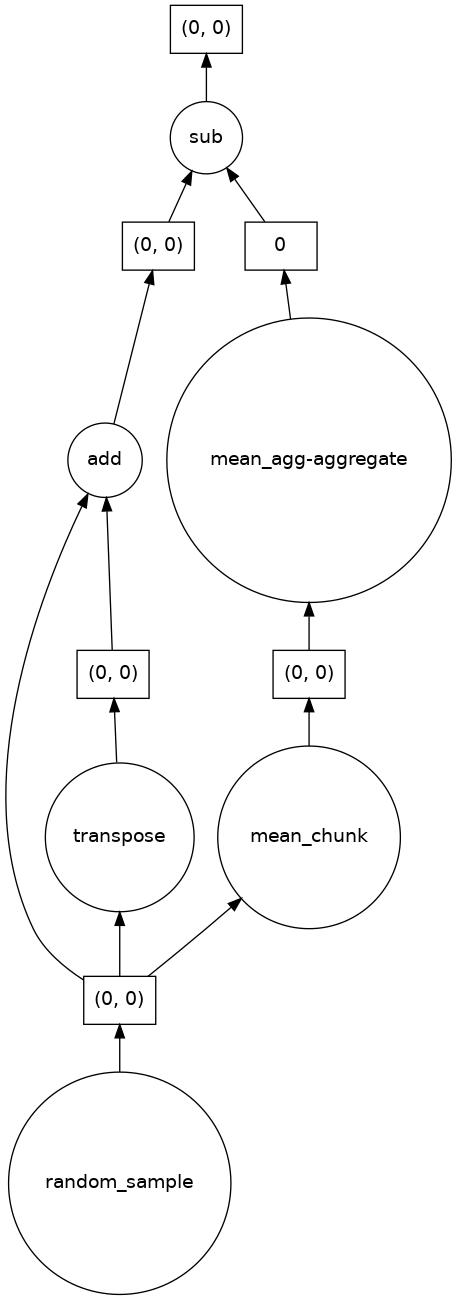

In [4]:
y.visualize()

In [2]:
import numpy as np
from numba import jit, njit, types, float64
import time

def regular_test_function():
    x1 = np.random.rand(1000, 1000)
    y1 = x1 + x1.T - np.mean(x1)
    return('done')

@njit
def compiled_test_function():
    x1 = np.random.rand(1000, 1000)
    y1 = x1 + x1.T - np.mean(x1)
    return('done')

@njit(parallel=True)
def parallel_test_function():
    x1 = np.random.rand(1000, 1000)
    y1 = x1 + x1.T - np.mean(x1)
    return('done')

def call_regular():
    for i in range(1000):
        regular_test_function()

def call_compiled():
    for i in range(1000):
        compiled_test_function()

def call_parallel():
    for i in range(1000):
        parallel_test_function()

start = time.time()
call_regular()
end = time.time()
print("Elapsed plain = %s" % (end - start))

start = time.time()
call_compiled()
end = time.time()
print("Elapsed jit non-parallel first = %s" % (end - start))

start = time.time()
call_compiled()
end = time.time()
print("Elapsed jit non-parallel second = %s" % (end - start))

start = time.time()
call_parallel()
end = time.time()
print("Elapsed jit parallel first = %s" % (end - start))

start = time.time()
call_parallel()
end = time.time()
print("Elapsed jit parallel second = %s" % (end - start))

parallel_test_function.parallel_diagnostics(level=4)

Elapsed jit parallel first = 24.674890518188477


Elapsed jit parallel second = 23.600866079330444
 
 Parallel Accelerator Optimizing:  Function parallel_test_function, 
/tmp/ipykernel_357/2429836906.py (16)  


Parallel loop listing for  Function parallel_test_function, /tmp/ipykernel_357/2429836906.py (16) 
------------------------------------------|loop #ID
@njit(parallel=True)                      | 
def parallel_test_function():             | 
    x1 = np.random.rand(1000, 1000)-------| #4
    y1 = x1 + x1.T - np.mean(x1)----------| #5, 6
    return('done')                        | 
--------------------------------- Fusing loops ---------------------------------
Attempting fusion of parallel loops (combines loops with similar properties)...
  Trying to fuse loops #4 and #7:
    - fusion succeeded: parallel for-loop #7 is fused into for-loop #4.
----------------------------- Before Optimisation ------------------------------
Parallel region 0:
+--4 (parallel)
+--7 (parallel)


------------------------------------------------------

In [18]:
compiled_test_function

CPUDispatcher(<function compiled_test_function at 0x7fdb46870af0>)

In [6]:
import platform
print("="*40, "System Information", "="*40)
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Node Name: {uname.node}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")

======================================== System Information ========================================
System: Linux
Node Name: project-3d94afca-069c-471c-9054-60422b7537d1
Release: 5.11.0-1020-gcp
Version: #22~20.04.1-Ubuntu SMP Tue Sep 21 10:54:26 UTC 2021
Machine: x86_64
Processor: x86_64


In [7]:
import psutil
# let's print CPU information
print("="*40, "CPU Info", "="*40)
# number of cores
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()
print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")
print(f"Current Frequency: {cpufreq.current:.2f}Mhz")
# CPU usage
print("CPU Usage Per Core:")
for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
    print(f"Core {i}: {percentage}%")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")

======================================== CPU Info ========================================
Physical cores: 2
Total cores: 4
Max Frequency: 0.00Mhz
Min Frequency: 0.00Mhz
Current Frequency: 2800.21Mhz
CPU Usage Per Core:


Core 0: 17.3%
Core 1: 15.6%
Core 2: 16.3%
Core 3: 17.2%
Total CPU Usage: 39.4%
